# Baby Names

This dataset contains information on how many babies were born with each name. Both the raw number and proportion of births for the year are included.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/zgulde/tidytuesday/master/data/2022/2022-03-22/babynames.csv'
df = pd.read_csv(url)
df.head()

- What were the 10 most popular names the year you were born?
- What year was your name the most popular?
- Where does your name rank for the year that you were born?
- Does your name increase or decrease in popularity compared to the year after the year you were born? The year before? What about 5 years before/after?
- Visualize your name's popularity over time.

In [7]:
# Names in 1985 most popular names 
df.loc[df.year == 1985, ['name', 'n']].sort_values(by = 'n').tail(10)


,name,n
973840,David,38513
973839,Daniel,38541
961338,Amanda,39055
973838,Joshua,42195
961337,Jennifer,42650
961336,Ashley,47007
973837,Matthew,47073
961335,Jessica,48346
973836,Christopher,59600
973835,Michael,64906


In [6]:
# Year my name most popular

df[df.name == 'Stephen'].groupby('year').n.sum().sort_values().tail(5)

year
1953    21846
1954    21897
1955    22167
1951    22526
1952    23076
Name: n, dtype: int64

In [12]:
# - Where does your name rank for the year that you were born?


df_85 = df[df.year == 1985]
df_85['rank'] = df_85.n.rank(ascending = False)
df_85[df_85.name == 'Stephen']

/var/folders/b2/3fdswr7x4v5fhdt54wpcfmdw0000gn/T/ipykernel_949/1070640372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_85['rank'] = df_85.n.rank(ascending = False)


,year,sex,name,n,prop,rank
962694,1985,F,Stephen,97,0.000053,2278.0
973870,1985,M,Stephen,12208,0.006346,61.0


(1960.0, 2020.0)

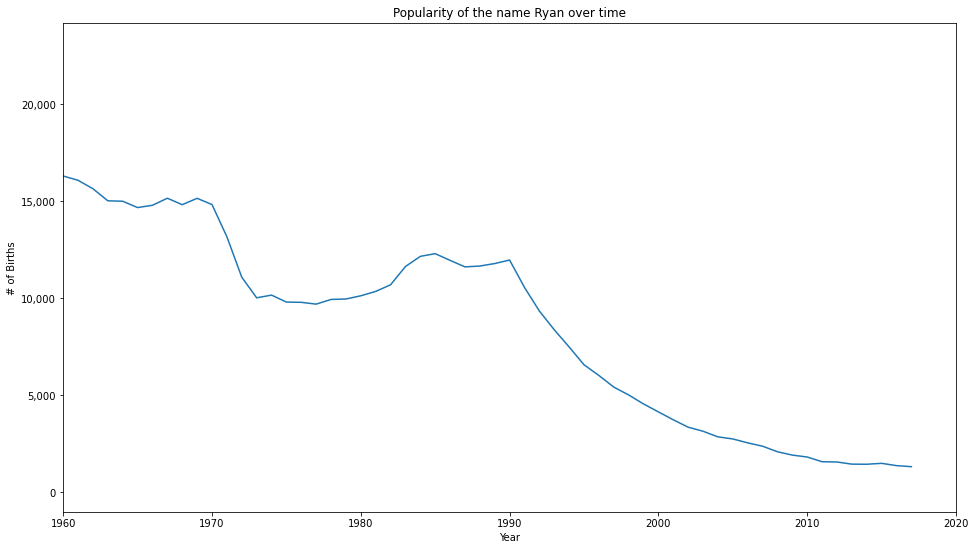

In [16]:
# - Does your name increase or decrease in popularity compared to the year after the year you were born? The year before? What about 5 years before/after?
plt.figure(figsize=(16, 9))
subset = df[df.name == 'Stephen']
subset = subset.groupby('year').n.sum()
plt.plot(subset.index, subset)
plt.xlabel('Year')
plt.ylabel('# of Births')
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.title('Popularity of the name Ryan over time')
plt.xlim(1960, 2020)

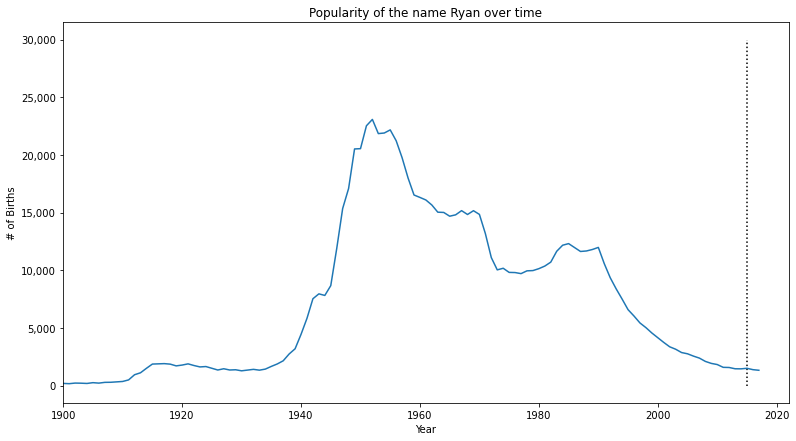

In [24]:
# - Visualize your name's popularity over time.

plt.figure(figsize=(13, 7))
subset = df[df.name == 'Stephen']
subset = subset.groupby('year').n.sum()
plt.plot(subset.index, subset)
plt.xlabel('Year')
plt.ylabel('# of Births')
plt.gca().yaxis.set_major_formatter('{:,.0f}'.format)
plt.title('Popularity of the name Ryan over time')
plt.xlim(1900, 2022)
plt.vlines(2015, 0, 30_000, color='black', ls=':')

### Rank Function

In [ ]:
# Creating the Series
sr = pd.Series([10, 25, 3, 11, 24, 6])
  
# Create the Index
index_ = ['Coca Cola', 'Sprite', 'Coke', 'Fanta', 'Dew', 'ThumbsUp']
  
# set the index
sr.index = index_
  
# Print the series
print(sr)
print()

# assign rank (rank does the average of their mean)
result = sr.rank()
  
# Print the result
print(result)